### Student Information
Name:

Student ID:R14K47024

GitHub ID:IvyChouCandy

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

### >>> **Set up**

In [4]:
### Begin Assignment Here
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import helpers.data_mining_helpers as dmh
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

### >>> **Exercise 1 :**

In [5]:
#load data
original_dataDf = pd.read_csv("./newdataset/Reddit-stock-sentiment.csv")
#see data
print(len(original_dataDf))

###Exercise 1 :print out the text data for the first three samples in the dataset.
for i in range(3):
    print(f"example{i+1}:")
    print("\n".join(original_dataDf["text"][i].split("\n")))

847
example1:
Calls on retards
example2:
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
example3:
Seeing lots of red in the ticker.


### >>> **Exercise 2:**

In [6]:
###Exercise 2 :query the last 10 records
print(original_dataDf["text"].tail(10))

837               Finance media lying \r\n\r\n*Surprise*
838                                          I am all in
839                                 The Art of the Deal…
840                                               Lol fr
841    So countries “begging to stop the tariffs” and...
842          Invest now it is going to shoot up tomorrow
843                               Where can I read this?
844    Upgrades, Downgrades\r\n\r\n [Stock Analyst Re...
845    i sold my puts so i expect cheeto to declare w...
846                         ![img](emote|t5_2th52|31224)
Name: text, dtype: object


### >>> **Exercise 4:**

In [7]:
###Exercise 4:check missing values
original_dataDf.isnull().apply(lambda x:dmh.check_missing_values(x))
#只有在"downvotes"及"upvote_ratio"欄位有缺失值，但這兩個欄位不是主要在pahse 1要分析的欄位

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0,0,0,783,783,0,0,0,0,0,0


### >>> **Exercise 5:**

In [8]:
###Exercise 5:check string type missing values
#check "text"、"sentiment" and "label"(確認是否含有string type的空值，只檢查這些欄位是因為主要在pahse 1分析的欄位是這三個)
try:
    # 建立布林遮罩，檢查是否為空字串或全空白
    mask = original_dataDf[["sentiment","label"]].apply(lambda col: col.str.strip().eq(""))
    empty_counts = mask.sum()
    print(empty_counts)
except AttributeError:
    print("No string type missing values found in 'sentiment' and 'label' columns.")
    # 建立布林遮罩，檢查是否為空字串或全空白
    mask_text = original_dataDf["text"].astype(str).str.strip().eq("") | original_dataDf["text"].isna()
    if mask_text.sum() > 0:
        print(f"Found {mask_text.sum()} string type missing values in 'text' column.")
    else:
        print("No string type missing values found in 'text' column.")
#因為"text"欄位與"sentiment"、"label"欄位的資料型態不同，所以分開檢查

No string type missing values found in 'sentiment' and 'label' columns.
No string type missing values found in 'text' column.


In [9]:
###check duplicates
sum_duplicates = original_dataDf.duplicated().sum()
if sum_duplicates > 0:
    print(f"Found {sum_duplicates} duplicate rows.")
else:
    print("No duplicate rows found.")

No duplicate rows found.


### >>> **Exercise 6:**

In [10]:
###Exercise 6:check difference between sampling and original data
sample_dataDf = original_dataDf.sample(n=int(0.2*len(original_dataDf)), random_state=42)
print(f"original data length: {len(original_dataDf)}")
print(f"sample data length: {len(sample_dataDf)}")
print("Equal?",original_dataDf.equals(sample_dataDf))
print("Index difference:",set(original_dataDf.index) - set(sample_dataDf.index))
print("Head of original data:",original_dataDf.head())
print("Head of sample data:",sample_dataDf.head())
#從結果可以看出，兩者的行列數、內容、順序、index皆不同

original data length: 847
sample data length: 169
Equal? False
Index difference: {0, 1, 2, 3, 4, 6, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 32, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 55, 56, 57, 58, 59, 60, 61, 62, 64, 68, 69, 70, 71, 73, 74, 75, 79, 80, 82, 83, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 98, 99, 100, 102, 103, 104, 105, 106, 107, 108, 111, 112, 113, 114, 115, 116, 117, 119, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 138, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 169, 170, 171, 172, 173, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 193, 194, 195, 197, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 212, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 228, 229, 230, 231, 232, 233, 234, 236, 237, 238, 239, 240, 241, 242, 24

### >>> **Exercise 7 :**

In [11]:
###Exercise 7:visualize and analyze the disparity between the two datasets
#檢查"sentiment"和"label"欄位的分布
original_sentiment_counts = original_dataDf['sentiment'].value_counts()
sample_sentiment_counts = sample_dataDf['sentiment'].value_counts()
original_label_counts = original_dataDf['label'].value_counts()
sample_label_counts = sample_dataDf['label'].value_counts()
print("Original sentiment distribution:\n", original_sentiment_counts)
print("Sample sentiment distribution:\n", sample_sentiment_counts)
print("Original label distribution:\n", original_label_counts)
print("Sample label distribution:\n", sample_label_counts)
#視覺化(使用自動調整ylim)

Original sentiment distribution:
 sentiment
 0.0    331
 1.0    319
-1.0    197
Name: count, dtype: int64
Sample sentiment distribution:
 sentiment
 0.0    67
 1.0    66
-1.0    36
Name: count, dtype: int64
Original label distribution:
 label
 0.0    423
-1.0    315
 1.0    109
Name: count, dtype: int64
Sample label distribution:
 label
 0.0    73
-1.0    66
 1.0    30
Name: count, dtype: int64


<Axes: title={'center': 'Original Sentiment Distribution'}, xlabel='sentiment'>

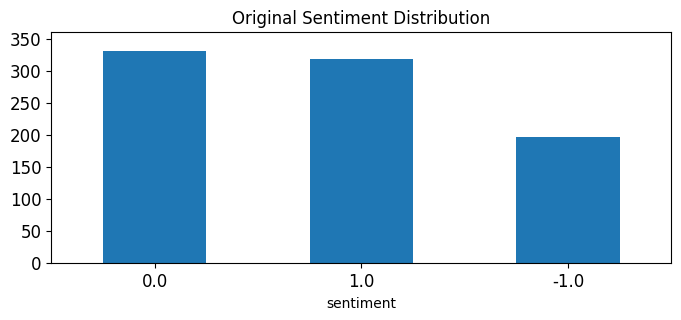

In [12]:
# Original Sentiment Distribution
original_sentiment_counts.plot(kind='bar', 
                               title='Original Sentiment Distribution', 
                               ylim=[0, original_sentiment_counts.max()+30],
                               rot=0,
                               fontsize=12,
                               figsize=(8,3))

<Axes: title={'center': 'Sample Sentiment Distribution'}, xlabel='sentiment'>

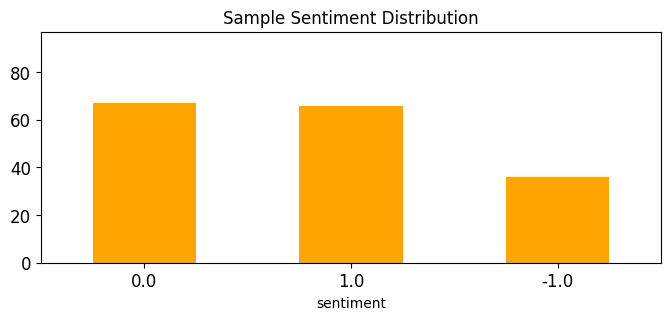

In [13]:
# Sample Sentiment Distribution
sample_sentiment_counts.plot(kind='bar',color='orange', 
                               title='Sample Sentiment Distribution', 
                               ylim=[0, sample_sentiment_counts.max()+30],
                               rot=0,
                               fontsize=12,
                               figsize=(8,3))

<Axes: title={'center': 'Original Label Distribution'}, xlabel='label'>

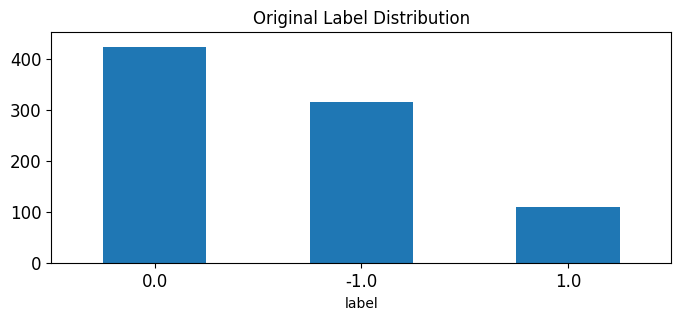

In [14]:
# Original Label Distribution
original_label_counts.plot(kind='bar', 
                               title='Original Label Distribution', 
                               ylim=[0, original_label_counts.max()+30],
                               rot=0,
                               fontsize=12,
                               figsize=(8,3))

<Axes: title={'center': 'Sample Label Distribution'}, xlabel='label'>

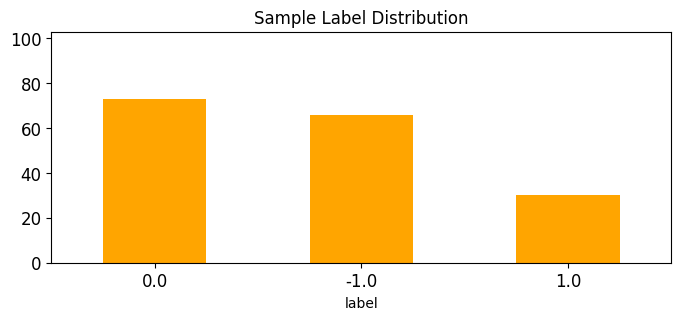

In [15]:
# Sample Label Distribution
sample_label_counts.plot(kind='bar',color='orange', 
                               title='Sample Label Distribution', 
                               ylim=[0, sample_label_counts.max()+30],
                               rot=0,
                               fontsize=12,
                               figsize=(8,3))

### >>> **Exercise 8 :** 

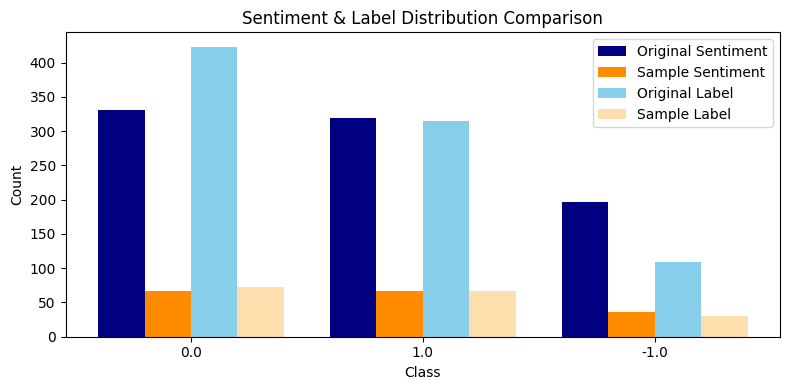

In [16]:
###Exercise 8 :combined bar plot
# 將四組資料放在同一張圖表中比較
# 假設這四個 Series 都是以 -1,0,1 為 index
x = np.arange(len(original_sentiment_counts.index))  # [-1,0,1] 的位置
width = 0.2  # 每個 bar 的寬度

fig, ax = plt.subplots(figsize=(8, 4))

# 繪製四組資料，依序往右偏移
ax.bar(x - 1.5*width, original_sentiment_counts.values, width, label='Original Sentiment', color='navy')
ax.bar(x - 0.5*width, sample_sentiment_counts.values, width, label='Sample Sentiment', color='darkorange')
ax.bar(x + 0.5*width, original_label_counts.values, width, label='Original Label', color='skyblue')
ax.bar(x + 1.5*width, sample_label_counts.values, width, label='Sample Label', color='navajowhite')

# 設定 x 軸
ax.set_xticks(x)
ax.set_xticklabels(original_sentiment_counts.index)  # -1, 0, 1

# 加上標題、圖例
ax.set_xlabel("Class")
ax.set_ylabel("Count")
ax.set_title("Sentiment & Label Distribution Comparison")
ax.legend()

plt.tight_layout()
plt.show()


### **>>> Exercise 9 :**

In [17]:
original_dataDf['unigrams'] = original_dataDf['text'].apply(lambda x: dmh.tokenize_text(x))
original_dataDf[0:4]["unigrams"]

0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
3    [Vision, Marine, Technologies, Inc., is, rewri...
Name: unigrams, dtype: object

In [18]:
count_vect = CountVectorizer()
original_countsVector = count_vect.fit_transform(original_dataDf['text'])
#set new analtzer
analyze = count_vect.build_analyzer()
###Exercise 9 :analyze the first record of original dataframe with the new analyzer
analyze(original_dataDf['text'][0])

['calls', 'on', 'retards']

### **>>> Exercise 10 :**

In [19]:
#check the shape of original_countsVector
original_countsVector.shape

(847, 4346)

In [20]:
###Exercise 10 :provide code that can verify what word 1 represents from the vocabulary(in the fifth record)
row = original_countsVector[4]  # 取得第五筆資料的稀疏矩陣表示
word_indices = row.nonzero()[1]  # 取得非零元素的索引
words = count_vect.get_feature_names_out()[word_indices]  # 取得詞彙表
# 印出第五筆資料中出現的詞彙
print("word indices in the fifth record:", word_indices)
print("words in the fifth record:", words)

word indices in the fifth record: [1846 1169 3349 3844 4333]
words in the fifth record: ['he' 'didn' 'say' 'thank' 'you']


### **>>> Exercise 11 :** 

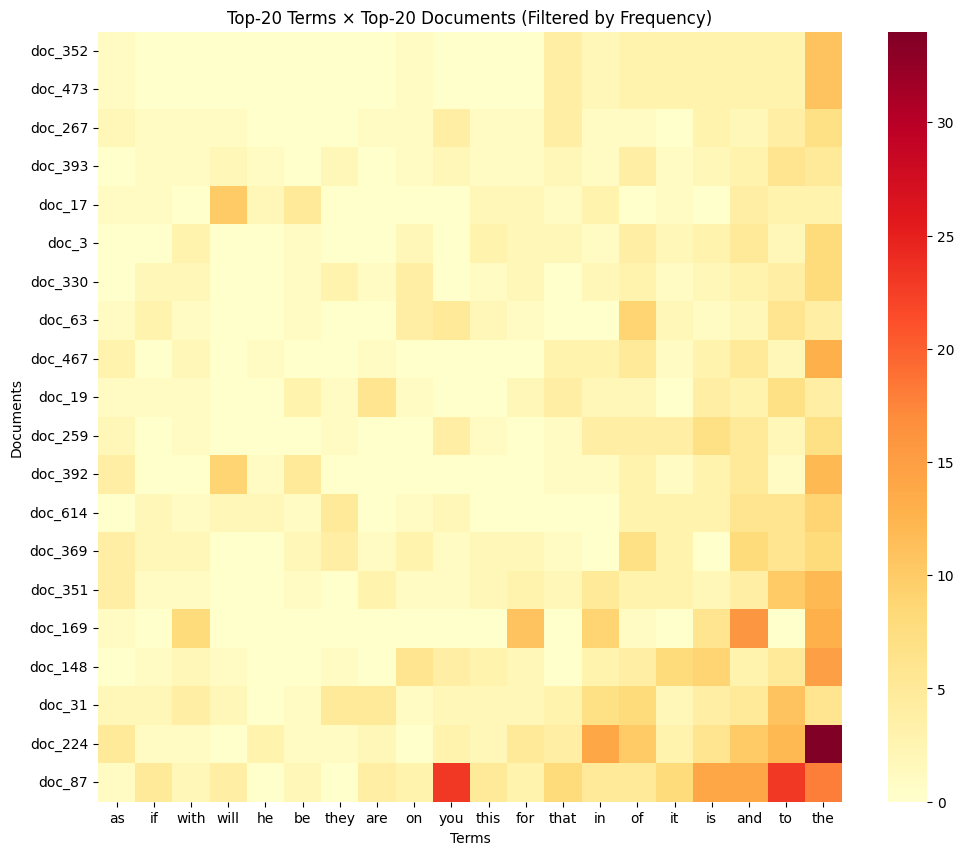

In [21]:
###Exercise 11 :draw heatmap
#先做詞頻統計，取出出現次數最高的前 N 個詞，再挑出這些詞裡，出現次數最多的文章，讓圖表更集中
# 計算每個詞的總頻率
# Step 1: 找出最常見的詞（例如 top 20）
word_freq = np.array(original_countsVector.sum(axis=0)).flatten()
top_terms_idx = word_freq.argsort()[-20:]
# Step 2: 在這些詞中，挑出最相關的文件
# 先把矩陣切到 top_terms
sub_matrix = original_countsVector[:, top_terms_idx]
# 計算文件總和（只針對這些詞）
doc_scores = np.array(sub_matrix.sum(axis=1)).flatten()
# 取出最高分的 20 文件
top_docs_idx = doc_scores.argsort()[-20:]
# Step 3: 建立子矩陣
sample_matrix = original_countsVector[top_docs_idx][:, top_terms_idx]

df_todraw = pd.DataFrame(
    sample_matrix.toarray(),
    columns=[count_vect.get_feature_names_out()[i] for i in top_terms_idx],
    index=["doc_" + str(i) for i in top_docs_idx]
)

# Step 4: 畫 heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_todraw, cmap="YlOrRd", cbar=True, annot=False)
plt.title("Top-20 Terms × Top-20 Documents (Filtered by Frequency)")
plt.xlabel("Terms")
plt.ylabel("Documents")
plt.show()

### >>> **Exercise 12 :**

In [22]:
#bulid term frequency matrix
term_frequencies = []
for j in range(0,original_countsVector.shape[1]):
    term_frequencies.append(sum(original_countsVector[:,j].toarray()))

In [23]:
term_frequencies = np.asarray(original_countsVector.sum(axis=0))[0]

In [24]:
###Exercise 12 :draw a nicer interactive visualization
import plotly.express as px

terms = count_vect.get_feature_names_out()

df = pd.DataFrame({
    "term": terms,
    "frequency": term_frequencies
})

df_300 = df[:300]

fig = px.bar(
    df_300,
    x="term",
    y="frequency",
    text="frequency", 
    title="Frequent Terms",
    labels={"term": "Term", "frequency": "Frequency"},
)

fig.update_traces(marker_color="orange", textposition="outside")
fig.update_layout(
    xaxis_tickangle=-45,
    template="plotly_white",
    font=dict(size=14)
)

fig.show()

### >>> **Exercise 13 :**

In [25]:
###Exercise 13 :efficiently reduce the number of terms want to visualize
df_top = df.sort_values(by="frequency", ascending=False)
#取前50個頻率最高的詞
df_top50 = df_top.head(50)

fig = px.bar(
    df_top50,
    x="term",
    y="frequency",
    text="frequency",   
    title="Top 50 Most Frequent Terms",
    labels={"term": "Term", "frequency": "Frequency"},
)

fig.update_traces(marker_color="orange", textposition="outside")
fig.update_layout(
    xaxis_tickangle=-45,
    template="plotly_white",
    font=dict(size=14)
)

fig.show()

### >>> **Exercise 14 :**

In [26]:
###Exercise 14:sort the terms on the `x-axis` by frequency instead of in alphabetical order
fig = px.bar(
    df_top.head(300),
    x="term",
    y="frequency",
    text="frequency",
    title="Terms (Sorted by Frequency)",
    labels={"term": "Term", "frequency": "Frequency"}
)

fig.update_traces(textposition="outside", marker_color="orange")
fig.update_layout(xaxis_tickangle=-45, template="plotly_white")
fig.show()

### >>> **Exercise 15 :** 

In [27]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

In [28]:
###Exercise 15:change the 'term_frequencies' variable for the 'term_frequencies_log'
log_df = pd.DataFrame({
    "term": terms,
    "frequency_log": term_frequencies_log
})

log_df_top = log_df.sort_values(by="frequency_log", ascending=False)
log_df_top300 = log_df_top.head(300)


fig = px.bar(
    log_df_top300,
    x="term",
    y="frequency_log",
    text="frequency_log",   
    title="Terms(Sorted by Log Frequency)",
    labels={"term": "Term", "frequency_log": "Frequency_log"},
)

fig.update_traces(marker_color="orange", textposition="outside")
fig.update_layout(
    xaxis_tickangle=-45,
    template="plotly_white",
    font=dict(size=14)
)

fig.show()

### >>> **new data visualizations** 

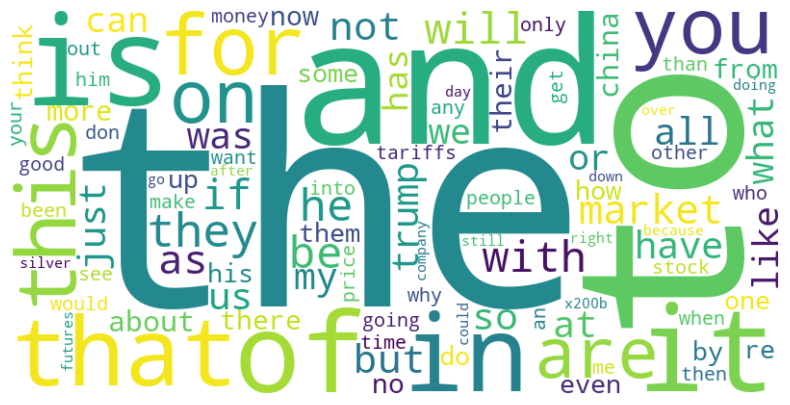

In [29]:
#New 1:詞雲
from wordcloud import WordCloud
# 建立字詞頻率字典
term_frequencieslist = term_frequencies.tolist()
word_freq_dict = dict(zip(terms, term_frequencieslist))
sorted_word_freq = dict(sorted(word_freq_dict.items(), key=lambda item: item[1], reverse=True)) #排序
#取前100出現最多次的詞
terms_keys = sorted_word_freq.keys()
dict_slice100 = {}
for key in list(terms_keys)[:100]:
    dict_slice100[key] = sorted_word_freq[key]
# 繪製詞雲
wordcloud = WordCloud(width=800, height=400, background_color="white", 
                      colormap="viridis").generate_from_frequencies(dict_slice100)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
#一樣使用詞出現的頻率來畫圖，圖中越大的詞代表出現頻率越高
#跟前面的長條圖表達的意義相同，都是"the"、"to"、"and"是前三高出現的詞

C:\Users\user\AppData\Local\Temp\ipykernel_9340\2634672769.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



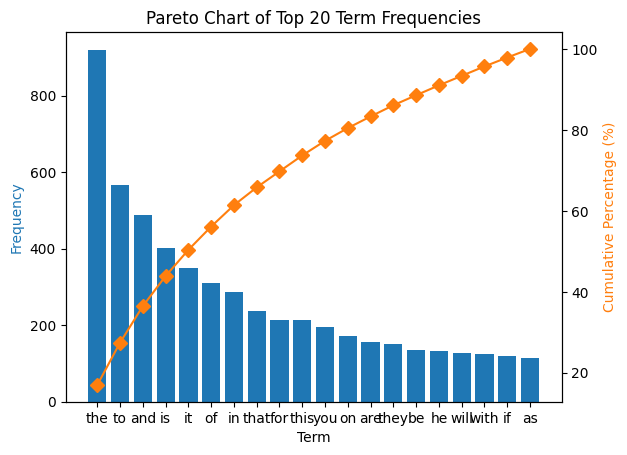

In [30]:
#New 2:Pareto Chart:結合長條圖和累積折線圖
#取前20頻率最高的字詞
df_20 = df_top.head(20)
#計算累積百分比
df_20["cum_percent"] = df_20["frequency"].cumsum()/df_20["frequency"].sum()*100

#繪圖
fig, ax1 = plt.subplots()

# 長條圖
ax1.bar(df_20["term"], df_20["frequency"], color='C0')
ax1.set_xlabel('Term')
ax1.set_ylabel('Frequency', color='C0')

# 折線圖
ax2 = ax1.twinx()
ax2.plot(df_20["term"], df_20["cum_percent"], color='C1', marker='D', ms=7)
ax2.set_ylabel('Cumulative Percentage (%)', color='C1')

plt.title('Pareto Chart of Top 20 Term Frequencies')
plt.show()

#由Pareto Chart中可以看出，長條圖很值觀的顯示哪些詞出現的頻率最高，而累積折線圖則可以看出這些高頻詞佔整體詞彙的比例
#根據所有詞彙的累積百分比，可以發現前8個高頻詞大約佔了總詞彙數的60%左右，這符合帕累托原理(80/20法則)中少數重要因素佔多數結果的概念

In [31]:
#New 3:Tree map:用矩形區塊大小表示詞頻
import plotly.express as px
#取前50頻率最高的字詞
df_top50 = df_top.head(50)
fig = px.treemap(
    df_top50,
    path=['term'],  # 使用 'term' 作為層級
    values='frequency',  # 使用 'frequency' 作為區塊大小
    title='Tree Map of Top 50 Terms by Frequency'
)
fig.show()
#由Tree map可以很直觀的看出哪些詞出現的頻率較高，因為這些詞會佔據較大的區塊面積
#像是"the"、"of"、"and"這些詞的區塊面積就明顯大於其他詞，表示它們出現的頻率較高


In [32]:
#New 4:Bubble Chart:字詞用氣泡大小表示頻率，可以加上其他維度（例如：詞長、TF-IDF 值）
#取前50頻率最高的字詞
df_20["term_length"] = df_20["term"].apply(len)
fig = px.scatter(
    df_20,
    x="term",
    y="frequency",
    size="frequency",  # 氣泡大小根據頻率
    color="term_length",  # 氣泡顏色根據詞長
    hover_name="term",  # 滑鼠懸停顯示詞
    title="Bubble Chart of Top 20 Terms",
    labels={"term": "Term", "frequency": "Frequency", "term_length": "Term Length"},
    size_max=60  # 最大氣泡大小
)
fig.show()
#由Bubble Chart可以看出哪些詞出現的頻率較高，因為這些詞會以較大的氣泡顯示
#同時也可以根據顏色看到詞長的分布情況


C:\Users\user\AppData\Local\Temp\ipykernel_9340\1893442800.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Phase 2
Phase2的練習皆以label欄位為主

### >>> **Exercise 16 :**


In [33]:
###Exercise 16:Review the words that were filtered in each category and comment about the differences and similarities that you can see.
#以label欄位為主

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# mine patterns that can be representative to each category
categories = original_dataDf['label'].unique()
category_dfs = {}
for category in categories:
    category_dfs[category] = original_dataDf[original_dataDf['label'] == category].copy()

def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [34]:
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])


For category -1.0 we filter the following words:
Bottom 1.0% words: 
youtube       1
500           1
program       1
60            1
65            1
6k            1
6th           1
77            1
7s            1
programs      1
projection    1
98            1
9k            1
_are          1
aapl          1
50            1
yourselves    1
2k            1
2s            1
30            1
3000          1
dtype: int64
Top 5.0% words: 
these         11
dollar        11
everyone      12
could         12
literally     12
            ... 
it           147
is           178
and          193
to           231
the          409
Length: 109, dtype: int64

For category 0.0 we filter the following words:
Bottom 1.0% words: 
186         1
18630       1
1870        1
1k          1
1m          1
2028        1
yahoo       1
yall        1
yea         1
worked      1
2045        1
208         1
21          1
22rate      1
23          1
234         1
2012        1
2017        1
20211209    1
14          1
14

### 發現
1. 最常見多半是一些停用詞，例如 “the”、 “to”、 “and”等，這些詞出現在各種類別中都很頻繁，但對主題判別沒有貢獻。
2. 低頻詞（Bottom 1%）被過濾掉的低頻詞大多是只出現一次或極少次的單字跟數字。

### >>> **Exercise 17 :**

In [35]:
from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Tranfer category name to a safe format for file naming
    category_str = str(category)
    category_safe = category_str.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = DF2DB(term_document_dfs[category])           
        
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)

In [36]:
# mining those patterns
# setting minSup at 9

from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_0_0.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_0= obj1.getPatternsAsDataFrame()
obj2 = alg.FPGrowth(iFile='td_freq_db_1_0.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_1= obj2.getPatternsAsDataFrame()
obj3 = alg.FPGrowth(iFile='td_freq_db_-1_0.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_2= obj3.getPatternsAsDataFrame()

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm


In [37]:
# integrate all mined patterns
dfs = [frequentPatternsDF_0, frequentPatternsDF_1, frequentPatternsDF_2]
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
total_patterns_count = sum(len(df) for df in dfs)
discarded_patterns_count = total_patterns_count - len(unique_patterns)

filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

In [38]:
# integrate these now category-specific patterns into data
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(original_dataDf['text'])
terms = count_vect.get_feature_names_out()  

original_dataDf['tokenized_text'] = original_dataDf['text'].str.split().apply(set)
pattern_matrix = pd.DataFrame(0, index=original_dataDf.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = original_dataDf['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=original_dataDf.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,01378,02,027,03,06,08,10,100,1000,10000,100k,100x,10k,10ks,10yr,11,116,118,12,1242,125,12855584,13,14,140,145,14th,15,150,153,15m,16,160,17,1700,1728,17th,18,...,zone,zsil,after,already,again,bad,should,sure,day,here,things,go,most,let,last,same,great,america,week,into,seems,want,looking,off,reddit,said,got,every,news,way,own,long,cash,still,weekly,ll,am,few,end,right
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
844,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
###Exercise 17:Implement the FAE Top-K and MaxFPGrowth algorithms 
#For the FAE Top-K, run trials with k values of 500, 1000, and 1500, recording the runtime for each. 
#For MaxFPGrowth, test minimum support thresholds of 3, 6, and 9
#Only implement '0' label category as an example

# FAE Top-K 採用方式 
from PAMI.frequentPattern.topk import FAE as topk_FAE
import time

iFile = 'td_freq_db_0_0.csv'  # 交易檔

fae_results = {}  # 儲存每次的 dataframe 與 runtime

for k in [500, 1000, 1500]:
    print(f"\n=== FAE Top-K: k = {k} ===")
    # 建立FAE 建構子參數以文件為主物件
    obj = topk_FAE.FAE(iFile=iFile, k=k)
    
    # 挖絕並測量時間
    start = time.time()
    obj.mine()
    end = time.time()
    runtime = end - start
    
    
    try:
        patterns_df = obj.getPatternsAsDataFrame()
    except Exception as e:
        # 若沒有 DataFrame 介面，讀出 obj.finalPatterns 或 obj.finalPatternSet
        print("無法用 getPatternsAsDataFrame() 取得 DataFrame，嘗試從物件屬性讀取...")
        if hasattr(obj, 'finalPatterns'):
            fp = obj.finalPatterns
            patterns_df = pd.DataFrame([(p, s) for p, s in fp.items()], columns=['Patterns','Support'])
        else:
            raise e
    
    
    print(f"找到模式數: {len(patterns_df)}; runtime(s): {runtime:.3f}")
    # 儲存檔案（供後續比對）
    outname = f'freq_patterns_comp_graphics_FAE_k{k}.txt'
    try:
        obj.save(outname)
    except Exception:
        # 若沒有內建 save，就以 dataframe 儲存
        patterns_df.to_csv(outname, index=False, sep='\t', encoding='utf-8')
    print(f"patterns saved -> {outname}")
    
    fae_results[k] = {'df': patterns_df, 'runtime': runtime}


=== FAE Top-K: k = 500 ===


KeyboardInterrupt: 

In [ ]:
# MaxFPGrowth 執行
from PAMI.frequentPattern.maximal import MaxFPGrowth as maxfp

maxf_results = {}

for minSup in [3, 6, 9]:
    print(f"\n=== MaxFPGrowth: minSup = {minSup} ===")
    obj = maxfp.MaxFPGrowth(iFile=iFile, minSup=minSup)
    
    start = time.time()
    obj.mine()
    end = time.time()
    runtime = end - start
    
    try:
        patterns_df = obj.getPatternsAsDataFrame()
    except Exception:
        print("無法用 getPatternsAsDataFrame() 取得 DataFrame，嘗試從物件屬性讀取...")
        if hasattr(obj, 'finalPatterns'):
            fp = obj.finalPatterns
            patterns_df = pd.DataFrame([(p, s) for p, s in fp.items()], columns=['Patterns','Support'])
        else:
            raise
    
    print(f"找到模式數: {len(patterns_df)}; runtime(s): {runtime:.3f}")
    outname = f'freq_patterns_comp_graphics_MaxFPGrowth_minSup{minSup}.txt'
    try:
        obj.save(outname)
    except Exception:
        patterns_df.to_csv(outname, index=False, sep='\t', encoding='utf-8')
    print(f"patterns saved -> {outname}")
    
    maxf_results[minSup] = {'df': patterns_df, 'runtime': runtime}

In [ ]:
# 比對工具函式
def pattern_set_from_df(df):
    # 假設欄位叫 'Patterns'；pattern 字串化形式要一致（空白分隔）
    return set(df['Patterns'].astype(str).tolist())

# FPGrowth 之前的結果
fp_df = frequentPatternsDF_0
fp_set = pattern_set_from_df(fp_df)

# 比對 FAE 各 k 與 MaxFPGrowth 各 minSup
def compare_sets(base_set, other_set):
    inter = base_set.intersection(other_set)
    uni = base_set.union(other_set)
    jaccard = len(inter) / len(uni) if len(uni) > 0 else 0.0
    return {'base_count': len(base_set), 'other_count': len(other_set),
            'intersection': len(inter), 'jaccard': jaccard}

print("=== Summary comparison with FPGrowth ===")
for k, info in fae_results.items():
    s = compare_sets(fp_set, pattern_set_from_df(info['df']))
    print(f"FAE k={k} | patterns={s['other_count']} | intersect={s['intersection']} | jaccard={s['jaccard']:.3f} | runtime(s)={info['runtime']:.3f}")

for minsup, info in maxf_results.items():
    s = compare_sets(fp_set, pattern_set_from_df(info['df']))
    print(f"MaxFPGrowth minsup={minsup} | patterns={s['other_count']} | intersect={s['intersection']} | jaccard={s['jaccard']:.3f} | runtime(s)={info['runtime']:.3f}")

# 如果要列出共同或差異的 pattern（例如前 20）
for k, info in fae_results.items():
    other_set = pattern_set_from_df(info['df'])
    common = sorted(list(fp_set & other_set))[:20]
    only_in_fae = sorted(list(other_set - fp_set))[:20]
    print(f"\nFAE k={k} — 共 {len(common)} 個與 FPGrowth 重疊（先列前 20）：")
    print(common)
    print(f"FAE k={k} — 僅出現在 FAE 的前 20：")
    print(only_in_fae)

for minsup, info in maxf_results.items():
    other_set = pattern_set_from_df(info['df'])
    common = sorted(list(fp_set & other_set))[:20]
    only_in_maxf = sorted(list(other_set - fp_set))[:20]
    print(f"\nMaxFPGrowth minsup={minsup} — 共 {len(common)} 個與 FPGrowth 重疊（先列前 20）：")
    print(common)
    print(f"MaxFPGrowth minsup={minsup} — 僅出現在 MaxFPGrowth 的前 20：")
    print(only_in_maxf)

### >>> **Exercise 18 :**

c:\Users\user\114-1MLHW\DM2025Labs\DM2025-Lab1-Exercise\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



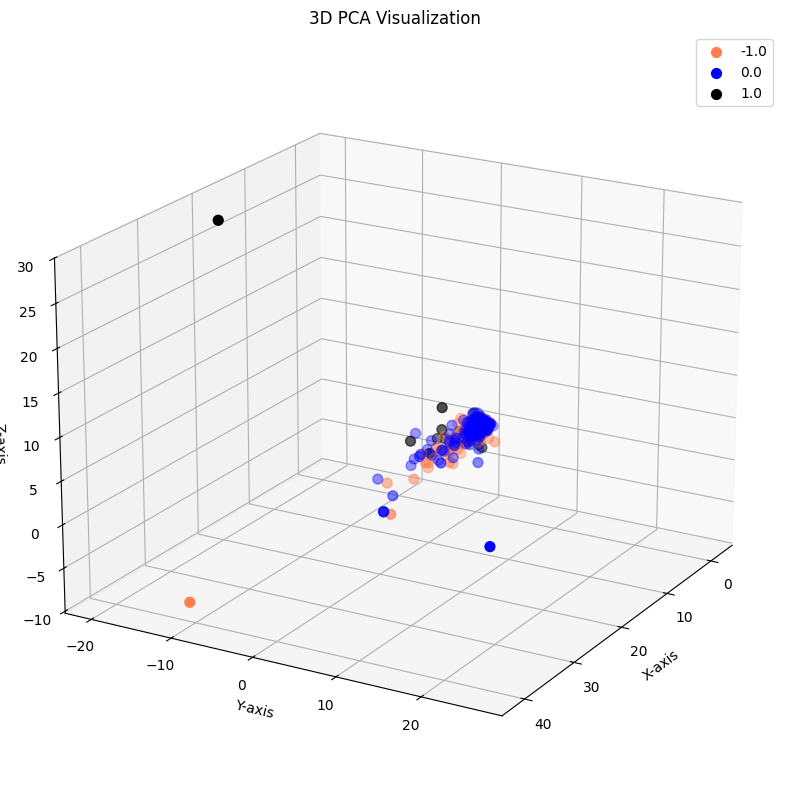

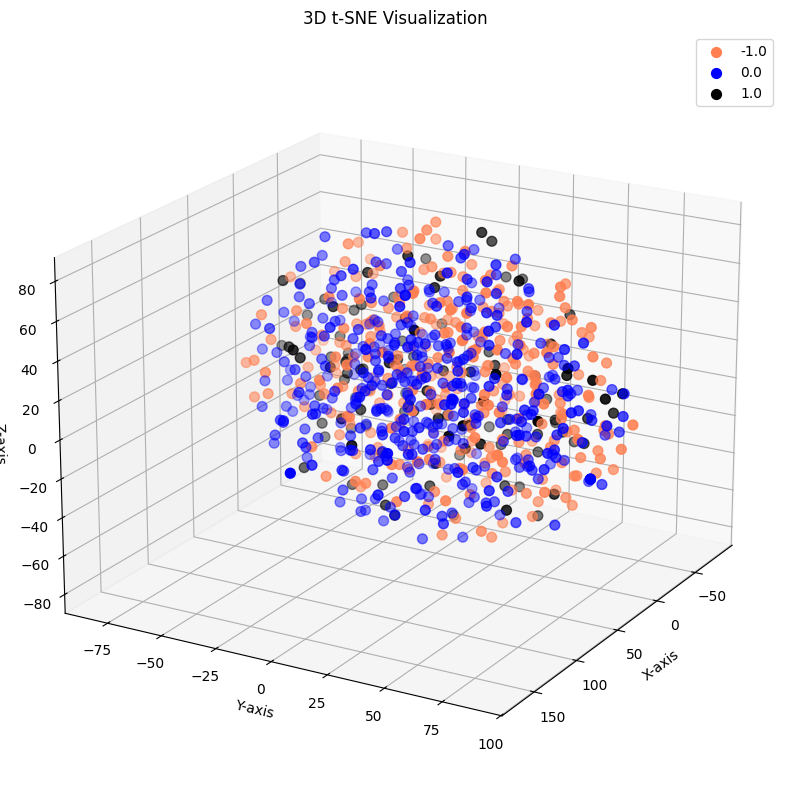

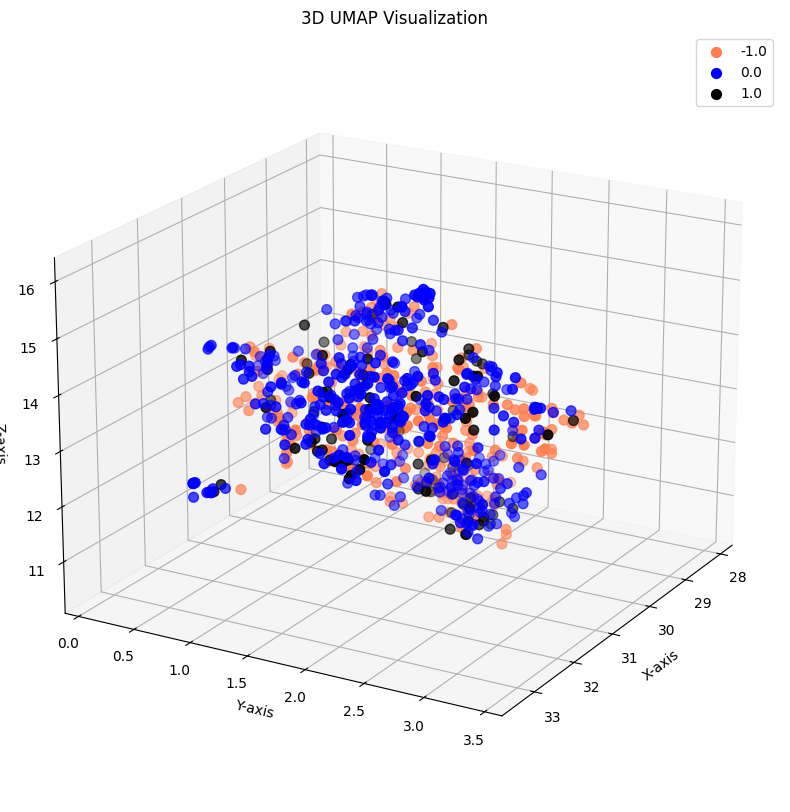

In [ ]:
###Exercise18:reduce the dimension to 3, and plot the result use 3-D plot
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 降維到 3 維
X_pca_3d = PCA(n_components=3).fit_transform(tdm_df.values)
X_tsne_3d = TSNE(n_components=3, random_state=42).fit_transform(tdm_df.values)
X_umap_3d = umap.UMAP(n_components=3, random_state=42).fit_transform(tdm_df.values)

col = ['coral', 'blue', 'black', 'orange']
categories = original_dataDf['label'].unique() 

# 定義繪圖函式
def plot_3d_scatter(X_reduced, title):
    fig = plt.figure(figsize=(16, 10))
    ax = fig.add_subplot(111, projection='3d')
    for c, category in zip(col, categories):
        xs = X_reduced[original_dataDf['label'] == category][:, 0]
        ys = X_reduced[original_dataDf['label'] == category][:, 1]
        zs = X_reduced[original_dataDf['label'] == category][:, 2]
        ax.scatter(xs, ys, zs, c=c, label=category, s=50)
    ax.set_title(title)
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    ax.legend()

    # 三個不同視角
    for elev, azim in [(20, 30), (60, 120), (30, 240)]:
        ax.view_init(elev=elev, azim=azim)
        plt.show()

# 各降維方法分別繪製
plot_3d_scatter(X_pca_3d, "3D PCA Visualization")
plot_3d_scatter(X_tsne_3d, "3D t-SNE Visualization")
plot_3d_scatter(X_umap_3d, "3D UMAP Visualization")

### 發現
1. PCA的結果中點的分佈明顯重疊，沒有明確邊界，顯示PCA難以清楚區分文本主題，有三個資料點與主要群集距離很遠，推測為outlier
2. t-SNE的結果中，點雲呈現球狀分布，不同類別的點互相混和，邊界模糊，未形成清晰群集
3. UMAP的結果中資料點也是呈現球狀分布，未形成清晰的群集
4. 降維至 3 維後，資料主題的分群性仍不強

### >>> **Exercise 20 :**

In [ ]:
###Exercise 20:observe from the Cosine Similarity results of different text references
from sklearn.preprocessing import binarize
from sklearn.metrics.pairwise import cosine_similarity

# retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = original_dataDf.iloc[10]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = original_dataDf.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = original_dataDf.iloc[500]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})


Cosine Similarity using count bw 1 and 2: 0.109109
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.142857
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\user\AppData\Local\Temp\ipykernel_18928\3048054539.py:41: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\user\AppData\Local\Temp\ipykernel_18928\3048054539.py:42: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\user\AppData\Local\Temp\ipykernel_18928\3048054539.py:43: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\user\AppData\Local\Temp\ipykernel_18928\3048054539.py:45: DeprecationWarning:

Conversion of an array with ndim > 0 to a 

### 發現
與自身相比時，餘弦相似度為 1，表示完全相似。根據餘弦相似度結果，Text 1、Text 2、Text 3 的語彙或主題互不接近，主題焦點相當不同。

### >>> **Exercise 21 :**

In [ ]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

category_mapping = {-1: "negative", 0: "neutral", 1: "positive"}
target_names = [category_mapping[i] for i in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, original_dataDf['label'], test_size=0.3, random_state=42)

# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))


Accuracy: 0.592156862745098

Classification Report:
               precision    recall  f1-score   support

    negative     0.5854    0.7347    0.6516        98
     neutral     0.6393    0.6446    0.6420       121
    positive     0.1000    0.0278    0.0435        36

    accuracy                         0.5922       255
   macro avg     0.4416    0.4690    0.4457       255
weighted avg     0.5425    0.5922    0.5612       255



In [ ]:
###Exercise 21:Use the augmented data to perform classification using Naive Bayes 
# Model with augmented data (TDM + pattern matrix)
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

category_mapping = {-1: "negative", 0: "neutral", 1: "positive"}
target_names = [category_mapping[i] for i in sorted(category_mapping.keys())]

# 分割資料集(70% train, 30% test)
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(
    augmented_df, original_dataDf['label'], test_size=0.3, random_state=42
)

# 訓練
nb_classifier_aug = MultinomialNB()
nb_classifier_aug.fit(X_train_aug, y_train_aug)

# 預測
y_pred_aug = nb_classifier_aug.predict(X_test_aug)

# 評估
print("Accuracy with augmented data:", accuracy_score(y_test_aug, y_pred_aug))
print("\nClassification Report (augmented data):\n",
      classification_report(y_test_aug, y_pred_aug, target_names=target_names, digits=4))


Accuracy with augmented data: 0.596078431372549

Classification Report (augmented data):
               precision    recall  f1-score   support

    negative     0.5950    0.7347    0.6575        98
     neutral     0.6371    0.6529    0.6449       121
    positive     0.1000    0.0278    0.0435        36

    accuracy                         0.5961       255
   macro avg     0.4440    0.4718    0.4486       255
weighted avg     0.5451    0.5961    0.5648       255



### >>> **Exercise 22 :**

### 發現
1. 整體準確率與平均 F1 分數皆有輕微提升（約 0.3–0.4%），說明pattern augmentation 對模型有正向但有限的幫助。
2. negative 類別在 precision 與 F1 上都有些微進步，表示模型更能分辨負面樣本。
3. neutral 類別的變化很小，但 recall 略有提升，代表中性類別的覆蓋率稍好。
4. positive 類別幾乎沒有改善，仍然是模型最弱的一類。
5. pattern強化了 negative 與 neutral 類別常見語意特徵。

### >>> **Exercise 23 :**

In [ ]:
# Decision Tree with only the document-term frequency data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data (already done above, but shown here for clarity)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, original_dataDf['label'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

Decision Tree Accuracy (TDM): 0.49019607843137253

Classification Report:
               precision    recall  f1-score   support

    negative     0.4878    0.4082    0.4444        98
     neutral     0.5294    0.6694    0.5912       121
    positive     0.2000    0.1111    0.1429        36

    accuracy                         0.4902       255
   macro avg     0.4057    0.3962    0.3928       255
weighted avg     0.4669    0.4902    0.4715       255



### 發現
| 原因面向  | 為什麼 Decision Tree 較差 | 對比 Naive Bayes 的優勢    |
| ----- | -------------------- | --------------------- |
| 特徵維度  | 高維稀疏特徵讓樹狀切割失效        | Naive Bayes 可直接處理稀疏詞頻 |
| 資料量   | 樹模型需要大量樣本避免過擬合       | Naive Bayes 在小樣本下仍穩定  |
| 特徵關聯  | 需找到有效分割點但難以做到        | 假設詞獨立，計算簡單且穩定         |
| 資料不平衡 | 易偏向多數類別（neutral）     | 以條件機率建模，不易嚴重偏斜        |

Decision Tree 在文字型 TDM 資料上的表現低於 Naive Bayes，主要原因是決策樹不擅長處理高維且稀疏的特徵空間，容易在少量樣本上overfitting。此外，文字資料中各詞的出現分佈極不均勻，使得決策樹難以找到具代表性的分割特徵。相較之下，Naive Bayes 基於條件機率的統計特性，能更有效地利用詞頻資訊，並在類別不平衡的情況下維持較佳的整體表現。

### >>> **Exercise 24 :**

In [ ]:
###Exercise 24:Implement using the augmented data

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data (already done above, but shown here for clarity)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, original_dataDf['label'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (augmented data):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

Decision Tree Accuracy (augmented data): 0.5019607843137255

Classification Report:
               precision    recall  f1-score   support

    negative     0.5200    0.3980    0.4509        98
     neutral     0.5120    0.7025    0.5923       121
    positive     0.2857    0.1111    0.1600        36

    accuracy                         0.5020       255
   macro avg     0.4393    0.4038    0.4011       255
weighted avg     0.4832    0.5020    0.4769       255



### 發現
(1) Decision Tree 在 augmented data 上略有提升

    準確率由 0.490 → 0.502，提升約 1.2%。

    Macro F1 由 0.3928 → 0.4011，也有小幅增加。

    說明 pattern augmentation 帶來的特徵在某種程度上增強了模型的區分類別能力。

    🔹 原因：

        加入 pattern 特徵後，模型多了額外的詞組或關鍵詞線索，使得部分類別（尤其是 neutral 類）更容易被分辨。

        這些 pattern 有助於減少特徵稀疏性，讓 Decision Tree 能找到稍微更有意義的分割點。

(2) 但表現仍明顯低於 Naive Bayes

    即使加上 pattern，Decision Tree 的準確率仍只有 0.50 左右，而 Naive Bayes 約為 0.59–0.60。

    Naive Bayes 的 F1-score 與整體穩定度都更高，特別是在 negative 與 neutral 類別。

    🔹 原因：

        Decision Tree 不適合高維稀疏的文字特徵：
        即使加入 pattern，TDM 本質仍是非常稀疏的矩陣，Decision Tree 仍難以有效學習。

        特徵切割方式限制了語意表達：
        Decision Tree 只能依靠單一特徵閾值切割，無法同時考慮多個詞之間的聯合語意；
        相比之下，Naive Bayes 的機率模型更能整合整體詞頻分佈。

        資料不平衡與過擬合問題仍存在：
        positive 類別樣本少（recall 只有 0.1111），導致樹模型仍傾向預測多數類別（neutral）。

### >>> **Exercise 25 :**

在我看來，選擇最適合特定任務的模型，需要綜合考慮資料特性、模型假設與實驗結果，而不是單純依靠準確率。

1.  根據資料特性選擇模型

    資料型態

        文字資料通常高維且稀疏（例如 TDM、TF-IDF），適合 Naive Bayes 這類統計型模型。

        如果資料是連續數值特徵或混合型特徵，則可以考慮 Decision Tree、SVM、Logistic Regression 等。

      資料規模

        小樣本數量：Naive Bayes 或線性模型通常表現較穩定。

        大樣本數量：較複雜模型（Decision Tree、Random Forest、LightGBM、深度學習）可能有更高潛力，但也容易過擬合。

    類別分布

        不平衡資料：需要考慮模型對少數類別的敏感度，以及是否支援加權或採樣調整。

2. 根據模型特性評估適合度
    | 模型類型                      | 優勢                   | 限制                       |
    | ------------------------- | -------------------- | ------------------------ |
    | Naive Bayes               | 高維稀疏資料表現穩定、計算快速、抗小樣本 | 假設特徵條件獨立，對特徵關聯不敏感        |
    | Decision Tree             | 容易理解、可以捕捉非線性關係       | 高維稀疏資料容易過擬合、泛化能力差        |
    | Random Forest / Boosting  | 抗過擬合、性能較高            | 計算成本高、模型解釋性較差            |
    | SVM / Logistic Regression | 線性分割穩定，支援正則化         | 對非線性特徵需要核方法，對超大維度稀疏資料需調整 |


3. 根據實驗結果選擇

     交叉驗證

        使用 k-fold cross-validation 來評估不同模型在訓練集與測試集上的穩定性。

        多指標評估

        除了準確率，也要看 F1-score、macro/weighted F1、recall 尤其是少數類別。

4. 對比不同特徵

    例如原始 TDM、pattern augmented TDM，觀察模型在不同特徵上的表現差異。

5. 綜合考量

    選擇最適合的模型不是單一標準，而是多個因素的平衡，上述文字分類例子中，Naive Bayes 因為能有效處理稀疏、高維文字特徵且對小樣本穩定，因此比 Decision Tree 更適合。但若資料量增加、特徵變得複雜或加入語意向量，其他模型（如 Random Forest、SVM 或深度學習）可能會表現更好。

### >>> **Third part :**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import classification_report, accuracy_score

# === 1. 讀取資料 ===
df = pd.read_csv("./newdataset/Reddit-stock-sentiment.csv") 
# 只取有用欄位(想觀察使用不同ground truth的影響)
df = df[['text', 'label', 'sentiment']].dropna() 

# === 2. 定義要比較的特徵生成器與分類器 ===
feature_extractors = {
    "Count": CountVectorizer(stop_words='english'),
    "TF-IDF": TfidfVectorizer(stop_words='english')
}

classifiers = {
    "MultinomialNB": MultinomialNB(),
    "ComplementNB": ComplementNB()
}

# === 3. 定義要比較的目標變數 ===
targets = {
    "label": df['label'],
    "sentiment": df['sentiment']
}


# === 4. 針對每種組合進行訓練與測試 ===
for target_name, y in targets.items():
    print(f"\n\n==========================")
    print(f"目前目標變數: {target_name}")
    print(f"==========================")
    
    X = df['text'].astype(str)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # 遍歷每種特徵與分類器
    for feat_name, vectorizer in feature_extractors.items():
        # 轉換特徵矩陣
        X_train_feat = vectorizer.fit_transform(X_train)
        X_test_feat = vectorizer.transform(X_test)
        
        for clf_name, clf in classifiers.items():
            print(f"\n--- 使用 {feat_name} 特徵 + {clf_name} 分類器 ---")
            
            # 訓練模型
            clf.fit(X_train_feat, y_train)
            
            # 預測
            y_pred = clf.predict(X_test_feat)
            
            # 評估結果
            acc = accuracy_score(y_test, y_pred)
            print(f"準確率: {acc:.4f}")
            print(classification_report(y_test, y_pred, zero_division=0))



目前目標變數: label

--- 使用 Count 特徵 + MultinomialNB 分類器 ---
準確率: 0.5176
              precision    recall  f1-score   support

        -1.0       0.50      0.63      0.56        67
         0.0       0.54      0.60      0.57        73
         1.0       0.50      0.07      0.12        30

    accuracy                           0.52       170
   macro avg       0.51      0.43      0.41       170
weighted avg       0.52      0.52      0.48       170


--- 使用 Count 特徵 + ComplementNB 分類器 ---
準確率: 0.4824
              precision    recall  f1-score   support

        -1.0       0.48      0.67      0.56        67
         0.0       0.52      0.45      0.49        73
         1.0       0.29      0.13      0.18        30

    accuracy                           0.48       170
   macro avg       0.43      0.42      0.41       170
weighted avg       0.47      0.48      0.46       170


--- 使用 TF-IDF 特徵 + MultinomialNB 分類器 ---
準確率: 0.5353
              precision    recall  f1-score   support

        

一、實驗背景
我使用不同的Naive Bayes預測Reddit 貼文的情緒類別，比較了4種組合
| 特徵                 | 模型                           |
| ------------------ | ---------------------------- |
| Count Vector（詞頻特徵） | MultinomialNB / ComplementNB |
| TF-IDF（詞頻–逆文件頻率特徵） | MultinomialNB / ComplementNB |

並設定兩種不同Target variable，觀察這些種種不同的設定是否會影響model預測結果

1. MultinomialNB:最常用於 文字分類（text classification）的model，根據每個詞在「同一類別裡」出現的次數去學習並假設每個詞對最終分類的影響是獨立的。

2. ComplementNB:是 MultinomialNB 的一種改良版本，主要用來解決 類別不平衡（class imbalance） 問題。在訓練過程中會對每一類別，計算其他類別的詞分佈，最後根據這些「互補詞分佈」修正模型參數，減少類別偏差。

二、實驗結果

(1)詞頻(Count) 特徵 vs TF-IDF 特徵 (對於label)
| 特徵+模型                     |準確率         | 說明                                      |
| ---------------------- | --------- | ---------------------------------------- |
| Count + MultinomialNB  | 0.5176    | 中等效果，模型對文字頻率較敏感。                         |
| TF-IDF + MultinomialNB | 0.5353    | 稍微提高，代表模型對重要詞的權重處理更好。                    |
| ComplementNB（兩者）       | 0.48–0.49 | 表現略低，說明此任務的類別不平衡較輕微，ComplementNB 的優勢不明顯。 |

(2)對sentiment的比較
| 特徵+模型                    | 準確率          | 說明             |
| ---------------------- | ----------- | ---------------- |
| Count + MultinomialNB  | 0.5000      | 基準表現。            |
| TF-IDF + MultinomialNB | 0.5353      | 提升明顯，表示語意權重有幫助。  |
| ComplementNB（兩者）       | 約 0.46–0.48 | 稍低，與 label 結果一致。 |


(3)「label」與「sentiment」的差異
| 比較項目  | label         | sentiment              |
| ----- | ------------- | ---------------------- |
| 來源    | 可能是人工或人工修正的標籤 | 根據文字極性自動計算             |
| 數據一致性 | 可能含主觀判斷與語境依賴  | 自動生成較穩定但粗略             |
| 模型表現  | 約 0.52–0.54   | 約 0.50–0.54            |
| 差異重點  | label 的關聯字更分散 | sentiment 主要靠情緒字詞（正負詞） |

(4)MultinomialNB vs ComplementNB 差異
| 模型                | 適用情況       | 實際表現             | 說明                                |
| ----------------- | ---------- | ---------------- | --------------------------------- |
| MultinomialNB | 一般文字分類任務   | 準確率最高（0.52–0.54） | 對文字頻率分佈敏感、常見於新聞/評論分析。             |
| ComplementNB  | 類別不平衡時表現較佳 | 準確率稍低（0.46–0.49） | 你的資料中三類數量接近，因此 ComplementNB 沒有優勢。 |


三、實驗討論
TF-IDF 給予罕見但有辨識力的詞更高權重，因此在 label 任務上略有提升。
然而，因為 label 是人工標註的結果，它可能與字面詞頻的關聯性更高，因此 Count 特徵也能有不錯表現。TF-IDF 在使用sentiment任務下能更好捕捉「有強烈情緒傾向」的字詞，因此表現略優。

四、when using augmentation with feature pattern

資料擴增（augmentation） 通常是為了解決以下問題：

類別不平衡（例如正評太少、負評太多）

樣本數太少導致模型過擬合

在文字任務中常見的方法包括：

同義詞替換（Synonym replacement）：替換詞彙但保留語意。

反向翻譯（Back translation）：用翻譯改寫句子。

隨機刪除／插入詞彙（Word dropout/insertion）。

對結果的影響：

若使用 Count 或 TF-IDF 特徵：

擴增資料能提升稀有詞的出現機率 → 模型更穩定。

若使用 ComplementNB：

augmentation 對平衡資料分佈會更明顯，因為它對類別條件概率調整較敏感。

預期結果：

在 label 任務上，augmentation 有助於模型辨識罕見語氣或特定情境詞。

在 sentiment 任務上，若新句子保留情緒詞（如 good, bad, crash, rise），準確率會顯著提升。

五、總結
| 分析面向     | 最佳設定                | 說明                   |
| -------- | ------------------- | -------------------- |
| 特徵選擇     | TF-IDF          | 對情緒詞更敏感，能突顯語意強度。     |
| 模型選擇     | MultinomialNB   | 適合文字分類、計算穩定。         |
| 目標變數     | label    | 語境豐富。          |
| 若資料少或不平衡 | 加入 augmentation | 尤其對 TF-IDF 特徵可提升泛化性。 |





### >>> **Forth part :**

一、前處理(Preprocessing)
| 問題                                                  | 原因              | 想法                                                              |
| --------------------------------------------------- | --------------- | ----------------------------------------------------------------- |
| 重複使用多個斷詞或清理工具（如 `nltk`、`re`、`CountVectorizer` 同時處理） | 功能重疊，增加時間成本     | 選一個清理流程即可，例如 `CountVectorizer(stop_words='english')` 就可自動去除停用詞    |
| 未明確控制 `max_features`                                | 可能產生過多特徵造成稀疏矩陣  | 建議設 `max_features=3000~5000` 以提升訓練速度與模型穩定性                        |
| 缺乏資料平衡檢查                                            | 某些類別樣本過少，導致模型偏差 | 可先用 `value_counts()` 查看類別分布，再用 `SMOTE` 或 `RandomOverSampler` 平衡資料 |

二、特徵工程(Feature Extraction)
| 問題                                        | 原因                    | 想法                                       |
| ----------------------------------------- | --------------------- | ------------------------------------------ |
| 同時用 `CountVectorizer` + `TfidfVectorizer` | 特徵重疊，無明顯效益            | 二選一：若關心詞頻比重，使用 `TfidfVectorizer`           |
| UMAP 視覺化在分類任務中多餘                          | 只是為了降維觀察資料分布，對模型訓練沒幫助 | 保留作分析用途，不需納入訓練流程                           |
| 使用自定義 Frequent Pattern Mining (`PAMI`)    | 該方法適合關聯分析，不適合文本分類     | 若目標是分類，應改用 `TF-IDF`、`word embeddings` 等表示法 |

三、模型訓練與預測（Model Training）
| 問題                                                        | 原因           | 改進建議                                               |
| --------------------------------------------------------- | ------------ | -------------------------------------------------- |
| 同時使用多種 Naive Bayes 模型（如 MultinomialNB、ComplementNB）但未比較差異 | 造成重複訓練，分析效率低 | 僅保留表現最佳者；ComplementNB 通常在不平衡資料上較穩定                 |
| 沒有 cross-validation                                       | 單次測試可能偏差     | 加入 `cross_val_score` 或 `GridSearchCV`              |
| 缺少 baseline 比較                                            | 無法看出改進效果     | 加入簡單 baseline（例如 always predict majority class）作對照 |